## Data Preprocessing

### Importing Libraries Used

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


import string
import emoji
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Loading Dataset

In [3]:
df = pd.read_csv('reviews_2.csv')

### Defining all stopwords used

In [2]:
# Since the reviews are mixed between Indonesian and English, therefore the stopwords used are a combination from both
stopwords_all = stopwords.words("indonesian") + stopwords.words("english")

# Defining other stopwords that are not common but used a lot in reviews/daily interactions 
stopwords_baru = ['sih', 'nya', 'iya', 'tah', 'ok', 'oke','bagus', 'eh', 'nya', 'jelek', 'coba', 'kecewa', 'banget', 'kayak', 'semoga', 'buruk', 'gue', 'kali', 'pas', 'mulu',
                  'sebelah', 'langsung', 'suka', 'maaf', 'sih', 'nya', 'di', 'ada', 'tempat', 'untuk', 'yang', 'ini', 'lagi', 'ya',
                  'saja', 'kok', 'deh', 'kalau', 'dan', 'kan', 'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo','kalo', 'amp', 'biar',
                  'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 
                  'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&amp', 'yah', 'ni', 'lg', 'tapi',
                  'bisa', 'tah', 'ya', 'sy', 'aku', 'dong', 'ud', 'dr', 'mn', 'km', "blibli"]
stopwords_all = stopwords_all + stopwords_baru

### Data Cleaning
The raw data from the reviews are usually full of emojis, unnecessary punctuations and digits, and also words that will not be beneficial in gaining information. Therefore, the data needs to be cleaned first before used. 

The data also needs to be labeled correctly based on its sentiments. To do this, we are going to label based on the ratings in which (0-2) star ratings will be considered negative sentiments and >=3 are positive sentiments. 

In [4]:
# function to remove unnecessary data and replacing some based on kamus alay dictionary (grabbed from Github)
def preprocess(s):
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s) 
    s = s.lower()
    s = re.sub(r'&gt|&lt', ' ', s)
    # letter repetition (if more than 2)
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # non-word repetition (if more than 1)
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # phrase repetition
    s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)
    s = ' '.join([kamus_alay_dict.get(w, w) for w in s.split()])
    
    return s.strip()

In [5]:
kamus_alay = pd.read_csv('new_kamusalay.csv', encoding="ISO-8859-1", header=None)

kamus_alay.loc[len(kamus_alay.index)] = ['onkir', 'ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['blanja', 'belanja'] 
kamus_alay.loc[len(kamus_alay.index)] = ['uninstal', 'uninstall'] 
kamus_alay.loc[len(kamus_alay.index)] = ['exsis', 'eksis'] 
kamus_alay.loc[len(kamus_alay.index)] = ['verivikasi', 'verifikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['recomended', 'recommended'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bajuz', 'bagus'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gw', 'gue'] 
kamus_alay.loc[len(kamus_alay.index)] = ['casback', 'cashback'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlwod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mw', 'mau'] 
kamus_alay.loc[len(kamus_alay.index)] = ['chasbcak', 'cashback']
kamus_alay.loc[len(kamus_alay.index)] = ['puazzz', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['puaaas', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mmbntu', 'membantu'] 
kamus_alay.loc[len(kamus_alay.index)] = ['diblibli', 'blibli'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gratong', 'gratis ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['cust', 'customer'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bibli', 'blibli']
kamus_alay.loc[len(kamus_alay.index)] = ['mncul', 'muncul']
kamus_alay.loc[len(kamus_alay.index)] = ['enag', 'enak']
kamus_alay.loc[len(kamus_alay.index)] = ['tlong', 'tolong']
kamus_alay.loc[len(kamus_alay.index)] = ['goodapp', 'good app']
kamus_alay.loc[len(kamus_alay.index)] = ['addres', 'address']
kamus_alay.loc[len(kamus_alay.index)] = ['adlh', 'adalah']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiny', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasix', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiyg', 'aplikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['aplikask', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikaso', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplilasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplk', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplkasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aamsung', 'samsung']
kamus_alay.loc[len(kamus_alay.index)] = ['apl', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['cant', "can't"]

indonesian_lexicon = pd.read_csv('lexicon.csv', encoding="ISO-8859-1", header=None)
indonesian_lexicon= indonesian_lexicon[[0, 1]]

frames = [kamus_alay, indonesian_lexicon]
  
kamus = pd.concat(frames)

In [6]:
kamus_alay_dict = {}
for i, row in kamus.iterrows():
  kamus_alay_dict[row[0]] = row[1]

In [7]:
bins = [0, 2, 5]
names = ['Negative', 'Positive']
exclist = string.digits + string.punctuation

# function used to remove stopwords that have been compiled 
def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_all]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_all]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# function used to remove special characters
def remove_special_characters(oldtext, remove_digits=True):
    table_ = str.maketrans(exclist, ' '*len(exclist))
    newtext = ' '.join(oldtext.translate(table_).split())
    return newtext

# function used to remove emoji
def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)


# function used to clean data from dataset
def clean_data(df):
    
    # feature selection
    filtered = pd.DataFrame(df, columns=['userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at'])
    
    # replacing missing data 
    filtered["reviewCreatedVersion"].fillna("missing", inplace=True)
    
    # dropping data and resetting index
    filtered.dropna(inplace=True)
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    # applying functions to remove punctuations, digits, and emojis
    filtered['content']=filtered['content'].apply(remove_special_characters)
    filtered['content']=filtered['content'].apply(give_emoji_free_text)

    # resetting index again
    filtered = filtered.dropna()
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    
    for indices, row in filtered.iterrows():
        sentence = preprocess(filtered['content'][indices])
        filtered['content'][indices] = sentence
    
    # data labeling
    filtered['sentiment'] = pd.cut(filtered['score'], bins, labels=names)
    
    
    # removing unnecessary data based on length
    filtered['content'] = filtered['content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
    filtered['content'] = filtered['content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<12]))
    
    # putting reviews in lowercase, and removing stopwords
    filtered['content'] = filtered['content'].str.lower()
    filtered['content'] = filtered['content'].apply(remove_stopwords)
    
    # removing reviews that now have no data inside of them after being filtered
    filtered = filtered.replace(r'^\s*$', np.NaN, regex=True)
    filtered = filtered.dropna()
    filtered =  filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    return filtered


df = clean_data(df)

<ipython-input-7-1e532df7a1a4>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['content'][indices] = sentence


In [8]:
pos_df = df[df['sentiment'] == 'Positive']

## Filtering Data Based on Pos Tag

POS tagging is the process of marking up a word in a corpus to a corresponding part of a speech tag, based on its context and definition. Filtering based on its POS tag is used to filter out unnecessary word like adjectives, pronouns, and to collect words that are in noun or verb form (to help in getting topics later on). 

In [15]:
tag_list = ['NN', 'NNS', 'NNP', 'NNPS', 'VBP', 'VBN', 'VBZ', 'VBG', 'VBD', 'WP']

def remove_punctuation_and_stopwords(text):
    llist = []
    sms_no_punctuation = [ch for ch in text if ch not in string.punctuation]
    tokens = "".join(sms_no_punctuation).split()

    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in tokens if word.lower() not in stopwords_all]
    
    tagged = nltk.pos_tag(sms_no_punctuation_no_stopwords)
#     print(tagged)
    for word, tag in tagged: 
        if (tag in tag_list):
            llist.append(word)
    
    return llist

In [16]:
df_reviews = pos_df.copy()

In [17]:
df_reviews= df_reviews.replace(r'^\s*$', np.NaN, regex=True)

In [18]:
df_reviews = df_reviews.reset_index()

In [19]:
df_reviews = df_reviews.dropna()

In [20]:
df_reviews = df_reviews.drop(columns=['index'], axis = 1)

In [21]:
df_reviews = df_reviews.rename(columns={'content': 'reviews'})

In [22]:
df_reviews

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment
0,Yosepa Sitokdana,mengikuti,5,0,missing,2021-12-29 14:32:57,Positive
1,blue Iza,fiturnya ribet barang mahal comerce,4,0,missing,2021-12-29 13:16:22,Positive
2,Anto Priyanto,aplikasi mudah belanja beli,5,0,8.3.5,2021-12-29 13:07:14,Positive
3,Parodi,mantabuu,5,0,8.3.5,2021-12-29 12:16:17,Positive
4,Edi Purnomo,beli toop,5,0,8.3.0,2021-12-29 11:45:43,Positive
...,...,...,...,...,...,...,...
83589,Endang Franika,sesuai slogan anytime anywhere belanja istilah...,4,0,1.2,2013-12-10 10:06:41,Positive
83590,Wendy Lin,yeay muncul enak simple selamat belanja,5,1,1.2,2013-12-10 09:59:07,Positive
83591,Rosidi Pratama,belanja mudah apps versi pertamanya ditunggu v...,5,1,1.2,2013-12-10 09:54:03,Positive
83592,Christian Ozora,great experience online belanja,4,0,missing,2013-12-10 09:06:34,Positive


In [23]:
# applying the pos tag function to dataset
df_reviews['noun'] = df_reviews['reviews'].apply(remove_punctuation_and_stopwords)

In [25]:
df = df_reviews.copy()

## Data Vectorization
Data vectorization is by using bag-of-words. The bag-of-words model converts text into fixed-length vectors by counting how many times each word appears.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(max_df = 0.5, min_df = 30, analyzer = remove_punctuation_and_stopwords).fit(df['reviews'])

In [51]:
bow_data = bow_transformer.transform(df['reviews'])

In [52]:
bow_data.shape

(83594, 765)

### Bag of Words Frequency Visualization
From the visualization, the words that are common already looks like topics that could be used. 

<AxesSubplot:ylabel='word'>

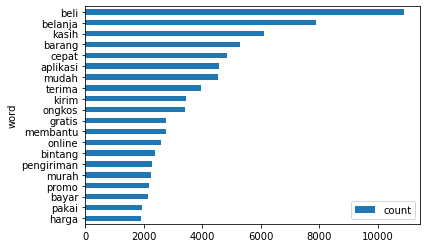

In [53]:
# most frequent words
word_count = pd.DataFrame({'word': bow_transformer.get_feature_names(), 'count': np.asarray(bow_data.sum(axis=0))[0]})

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

## Finding Coherence Value to get Topics 
This is because after iterations of LDA model, the topics gotten are not very accurate therefore another method to find an effective number of topics are by using coherence values. 

In [63]:
from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=30, no_above=0.5) 
print(dictionary)

Dictionary(765 unique tokens: ['mengikuti', 'barang', 'fiturnya', 'mahal', 'ribet']...)


In [64]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

print(len(doc_term_matrix))
print(doc_term_matrix[10])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

83594
[(8, 1), (13, 1), (14, 1), (15, 1)]


In [65]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100, random_state=123)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

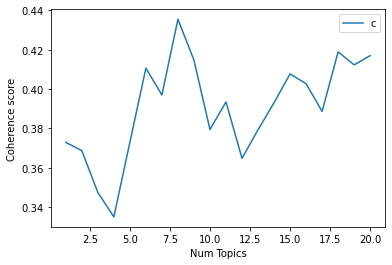

In [66]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [67]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3729
Num Topics = 2  has Coherence Value of 0.3687
Num Topics = 3  has Coherence Value of 0.3474
Num Topics = 4  has Coherence Value of 0.335
Num Topics = 5  has Coherence Value of 0.3729
Num Topics = 6  has Coherence Value of 0.4106
Num Topics = 7  has Coherence Value of 0.397
Num Topics = 8  has Coherence Value of 0.4355
Num Topics = 9  has Coherence Value of 0.4147
Num Topics = 10  has Coherence Value of 0.3794
Num Topics = 11  has Coherence Value of 0.3935
Num Topics = 12  has Coherence Value of 0.3648
Num Topics = 13  has Coherence Value of 0.3793
Num Topics = 14  has Coherence Value of 0.393
Num Topics = 15  has Coherence Value of 0.4077
Num Topics = 16  has Coherence Value of 0.4027
Num Topics = 17  has Coherence Value of 0.3886
Num Topics = 18  has Coherence Value of 0.4189
Num Topics = 19  has Coherence Value of 0.4123
Num Topics = 20  has Coherence Value of 0.417


### An optimal number of topics is when the coherence score is at its highest. Therefore, from the cell above, it can be concluded that 8 number of topics is the most optimal one. 

## LDA (LatentDirichAllocation)

In [33]:
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
import joblib

In [68]:
lda = LatentDirichletAllocation(n_components = 8)
lda.fit_transform(bow_data)
joblib.dump(lda, 'lda_positive.pkl')

# buat buka: lda = joblib.load('lda_pos_2.pkl')

['lda_positive.pkl']

In [69]:
lda.fit_transform(bow_data)

array([[0.0625    , 0.0625    , 0.06257682, ..., 0.06253583, 0.0625    ,
        0.0625    ],
       [0.0250087 , 0.02500953, 0.62497478, ..., 0.02500142, 0.025     ,
        0.02500437],
       [0.0250002 , 0.2416303 , 0.025     , ..., 0.29792558, 0.02507653,
        0.0250013 ],
       ...,
       [0.01785717, 0.0178584 , 0.01789889, ..., 0.01786046, 0.43171583,
        0.16133287],
       [0.03125005, 0.03125236, 0.03125   , ..., 0.03125623, 0.78123319,
        0.03125039],
       [0.5625    , 0.0625    , 0.0625    , ..., 0.0625    , 0.0625    ,
        0.0625    ]])

In [70]:
lda_output = lda.fit_transform(bow_data)

In [71]:
lda_output.shape

(83594, 8)

In [72]:
# function to print top words from LDA model 
def print_top_words(model, bow_transformer, n_top_words):
    feature_names = bow_transformer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [73]:
print_top_words(lda, bow_transformer, n_top_words=10)


Topic #0: mudah membantu belanja ribet transaksi aman berbelanja praktis pakai kebutuhan

Topic #1: murah harga handphone lengkap barang shop online recommended customer service

Topic #2: aplikasi kredit aplikasinya pakai apps kartu cilan pelayan bermanfaat simple

Topic #3: kirim ongkos gratis bayar mencoba hebat ongkirnya indonesia rumah kupon

Topic #4: beli belanja online produk barang terbaik diskon seller fitur toko

Topic #5: kasih terima barang promo beli pembayaran note order pelayannya pilihan

Topic #6: memuaskan sukses promonya poknya buka masuk habis blibi application menarik

Topic #7: cepat bintang pengiriman barang kasih sesuai barangnya terpercaya proses respon



In [74]:
# function to show topics based on matrix
def show_topics(vectorizer=bow_transformer, lda_model=lda, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=bow_transformer, lda_model=lda, n_words=20)        

# Assigning it to dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,mudah,membantu,belanja,ribet,transaksi,aman,berbelanja,praktis,pakai,kebutuhan,diskonnya,asyik,pembayaran,joss,nyaman,simpel,mencicil,prosesnya,tiket,mantull
Topic 1,murah,harga,handphone,lengkap,barang,shop,online,recommended,customer,service,harganya,mahal,bersaing,lancar,toko,delivery,tukar,marketplace,pertahankan,user
Topic 2,aplikasi,kredit,aplikasinya,pakai,apps,kartu,cilan,pelayan,bermanfaat,simple,bintangnya,sayang,pembayaran,pengin,paylater,tambahkan,error,orang,enak,discount
Topic 3,kirim,ongkos,gratis,bayar,mencoba,hebat,ongkirnya,indonesia,rumah,kupon,pakai,ditempat,biaya,promo,memudahkan,ribu,tingkatkan,bebas,cashback,gopay
Topic 4,beli,belanja,online,produk,barang,terbaik,diskon,seller,fitur,toko,senang,chat,berbelanja,kualitas,mencari,mempermudah,pengalaman,bli,markotop,store
Topic 5,kasih,terima,barang,promo,beli,pembayaran,note,order,pelayannya,pilihan,metode,kupon,kadang,unduh,menarik,kode,cash,saran,poin,diskon
Topic 6,memuaskan,sukses,promonya,poknya,buka,masuk,habis,blibi,application,menarik,maju,senang,juragan,susah,produk,produknya,pelanggan,perbaiki,akun,dibuka
Topic 7,cepat,bintang,pengiriman,barang,kasih,sesuai,barangnya,terpercaya,proses,respon,pesan,rapi,rekan,commerce,packing,ramah,aman,bareng,mantab,dikirim


### From the dataframe above, the 10 topics and words in each topic looks similar to each other. From this, we can assign each topic with labels manually. 

In [76]:
LDA_topics_theme = ['shopping experience','service','pembayaran','ongkir','produk','promo', 'aplikasi','pengiriman']

df_topic_keywords['topic_theme'] = LDA_topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

topic_theme,shopping experience,service,pembayaran,ongkir,produk,promo,aplikasi,pengiriman
Word 0,mudah,murah,aplikasi,kirim,beli,kasih,memuaskan,cepat
Word 1,membantu,harga,kredit,ongkos,belanja,terima,sukses,bintang
Word 2,belanja,handphone,aplikasinya,gratis,online,barang,promonya,pengiriman
Word 3,ribet,lengkap,pakai,bayar,produk,promo,poknya,barang
Word 4,transaksi,barang,apps,mencoba,barang,beli,buka,kasih
Word 5,aman,shop,kartu,hebat,terbaik,pembayaran,masuk,sesuai
Word 6,berbelanja,online,cilan,ongkirnya,diskon,note,habis,barangnya
Word 7,praktis,recommended,pelayan,indonesia,seller,order,blibi,terpercaya
Word 8,pakai,customer,bermanfaat,rumah,fitur,pelayannya,application,proses
Word 9,kebutuhan,service,simple,kupon,toko,pilihan,menarik,respon


In [79]:
v = lda_output
v = v*100
len(v)

83594

In [82]:
LDA_df = pd.DataFrame(v,columns=df_topic_keywords.T.columns)

In [83]:
LDA_df

topic_theme,shopping experience,service,pembayaran,ongkir,produk,promo,aplikasi,pengiriman
0,6.250000,6.250000,6.256218,6.250000,6.250000,56.243780,6.250000,6.250000
1,22.518249,62.467446,2.500000,2.500271,2.501485,2.503771,2.506029,2.502749
2,25.708466,2.500000,22.433653,2.500028,39.357138,2.500639,2.500075,2.500001
3,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000
4,6.250002,6.250001,6.250000,6.250000,56.246044,6.253541,6.250412,6.250000
...,...,...,...,...,...,...,...,...
83589,1.787290,1.786063,1.789017,16.019234,15.158429,1.789805,31.269233,30.400929
83590,3.127893,3.125000,3.130835,3.125091,28.121893,3.127502,53.116785,3.125001
83591,30.351488,1.785714,44.638394,1.785777,1.791626,16.070898,1.790387,1.785715
83592,3.126182,3.129537,3.125000,28.234271,53.010010,3.125000,3.125000,3.125000


## Topic Mapping
Since we have assigned topics to labels manually, we can map each data into a label. To do this, we can compute the confidence of category prediction based on distribution in the list. 

In [84]:
# To compute the confidence score of category prediction based on the numerical distribution of values in the list
def computeConfidence(similarityList):
    
    similarScores = set(similarityList) 
    highest = max(similarScores)
    
    similarScores.remove(highest)
    if (len(similarScores) == 0):
        return 0
    
    secondHighest = max(similarScores)
    
    return (highest - secondHighest)/ (highest)

In [85]:
dominant_topic = np.nanargmax(LDA_df.values, axis=1)

LDA_df['confidence'] = LDA_df.apply (lambda row: computeConfidence(row), axis=1)
LDA_df['dominant_topic'] = dominant_topic

In [86]:
final = pd.concat([df,LDA_df[['dominant_topic','confidence']]],axis=1)
final

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment,noun,dominant_topic,confidence
0,Yosepa Sitokdana,mengikuti,5,0,missing,2021-12-29 14:32:57,Positive,[mengikuti],5,0.888766
1,blue Iza,fiturnya ribet barang mahal comerce,4,0,missing,2021-12-29 13:16:22,Positive,"[fiturnya, ribet, barang, mahal, comerce]",1,0.639520
2,Anto Priyanto,aplikasi mudah belanja beli,5,0,8.3.5,2021-12-29 13:07:14,Positive,"[aplikasi, mudah, belanja, beli]",4,0.346790
3,Parodi,mantabuu,5,0,8.3.5,2021-12-29 12:16:17,Positive,[mantabuu],0,0.000000
4,Edi Purnomo,beli toop,5,0,8.3.0,2021-12-29 11:45:43,Positive,"[beli, toop]",4,0.888818
...,...,...,...,...,...,...,...,...,...,...
83589,Endang Franika,sesuai slogan anytime anywhere belanja istilah...,4,0,1.2,2013-12-10 10:06:41,Positive,"[sesuai, slogan, istilah, buka, rumah, kantor,...",6,0.027769
83590,Wendy Lin,yeay muncul enak simple selamat belanja,5,1,1.2,2013-12-10 09:59:07,Positive,"[yeay, muncul, selamat, belanja]",6,0.470565
83591,Rosidi Pratama,belanja mudah apps versi pertamanya ditunggu v...,5,1,1.2,2013-12-10 09:54:03,Positive,"[belanja, mudah, apps, versi, pertamanya, ditu...",2,0.320059
83592,Christian Ozora,great experience online belanja,4,0,missing,2013-12-10 09:06:34,Positive,"[experience, online, belanja]",4,0.467379


In [87]:
final.tail(10)

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment,noun,dominant_topic,confidence
83584,John Tan,asyik beli pakenya cepat speed gambar gede lih...,5,2,1.2,2013-12-10 12:21:45,Positive,"[asyik, beli, pakenya, cepat, speed, gambar, g...",6,0.081792
83585,Widyanto,terima kasih mobile apps belanja handphone cep...,5,0,1.2,2013-12-10 12:11:43,Positive,"[terima, kasih, apps, belanja, handphone, cepa...",5,0.389150
83586,Jaya Frandy,elegan tampilan cepat koneksi enjoy browsing,5,0,1.2,2013-12-10 11:12:27,Positive,"[tampilan, cepat, koneksi, enjoy, browsing]",6,0.639938
83587,Welly Dwi Putra,simple smooth navigation like,5,0,1.2,2013-12-10 10:43:05,Positive,[navigation],0,0.000000
83588,Stefanus Adiputra,great apps,5,0,1.2,2013-12-10 10:20:55,Positive,[apps],2,0.888889
83589,Endang Franika,sesuai slogan anytime anywhere belanja istilah...,4,0,1.2,2013-12-10 10:06:41,Positive,"[sesuai, slogan, istilah, buka, rumah, kantor,...",6,0.027769
83590,Wendy Lin,yeay muncul enak simple selamat belanja,5,1,1.2,2013-12-10 09:59:07,Positive,"[yeay, muncul, selamat, belanja]",6,0.470565
83591,Rosidi Pratama,belanja mudah apps versi pertamanya ditunggu v...,5,1,1.2,2013-12-10 09:54:03,Positive,"[belanja, mudah, apps, versi, pertamanya, ditu...",2,0.320059
83592,Christian Ozora,great experience online belanja,4,0,missing,2013-12-10 09:06:34,Positive,"[experience, online, belanja]",4,0.467379
83593,Jemmy Thendra,simple responsive complete products like anyti...,4,1,1.2,2013-12-10 05:20:09,Positive,"[products, anytime]",1,0.888889


In [88]:
# Converting dominant topics numbers to names
def label_theme(row):
    if (row['dominant_topic'] > len(LDA_topics_theme) or row['dominant_topic'] < 0):
        return ""
    return LDA_topics_theme[int(row['dominant_topic'])]

final['dominant_topic_theme'] = final.apply (lambda row: label_theme(row), axis=1)
final.head()

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment,noun,dominant_topic,confidence,dominant_topic_theme
0,Yosepa Sitokdana,mengikuti,5,0,missing,2021-12-29 14:32:57,Positive,[mengikuti],5,0.888766,promo
1,blue Iza,fiturnya ribet barang mahal comerce,4,0,missing,2021-12-29 13:16:22,Positive,"[fiturnya, ribet, barang, mahal, comerce]",1,0.639520,service
2,Anto Priyanto,aplikasi mudah belanja beli,5,0,8.3.5,2021-12-29 13:07:14,Positive,"[aplikasi, mudah, belanja, beli]",4,0.346790,produk
3,Parodi,mantabuu,5,0,8.3.5,2021-12-29 12:16:17,Positive,[mantabuu],0,0.000000,shopping experience
4,Edi Purnomo,beli toop,5,0,8.3.0,2021-12-29 11:45:43,Positive,"[beli, toop]",4,0.888818,produk


## Saving Labeled Data to CSV file

In [92]:
final[['reviews', 'dominant_topic_theme']].sample(10)

,reviews,dominant_topic_theme
41905,bintang,pengiriman
80476,lengkap murah,service
62691,muda membantu ribet,shopping experience
66655,mencoba,ongkir
25210,sukses,aplikasi
47038,good,shopping experience
29219,gratis ongikr bayar ongkinya,ongkir
70277,beli,produk
55892,memuaskan vocher semangat belanja,produk
11473,mudah sesuai harapkan,pengiriman


In [95]:
final.to_csv('topic_positive.csv', index=False)